<a href="https://colab.research.google.com/github/Covic/P2ISLA_2023_G_AnDaVa/blob/main/ProjetoIIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importa as bibliotecas


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import requests
import io

In [2]:
# Caminho para os arquivos CSV
url_cities = 'https://drive.google.com/file/d/1w4RTI9tqUBXFOawQUvhkpPZ0Ie6m1Zl3/view?usp=sharing '
url_sales = 'https://drive.google.com/file/d/1xVHv5Dbd2Ot5MJptWLd3FFzEmjI2UEat/view?usp=drive_link'
url_product = 'https://drive.google.com/file/d/1-xZWqrotDIYcAEK-2P3fKGU1fOTqxv3J/view?usp=drive_link'


In [3]:
#Le url do drive
#csv cities
file_id_cities = '1w4RTI9tqUBXFOawQUvhkpPZ0Ie6m1Zl3'
url_cities = f'https://drive.google.com/uc?id={file_id_cities}'
cities = pd.read_csv(url_cities)

#csv product
file_id_product = '1wQSI6rSeapiPrPn4tQkJUsmMABptTiIn'
url_product = f'https://drive.google.com/uc?id={file_id_product}'
product = pd.read_csv(url_product)

In [4]:
# Exibindo o conteúdo do dataframe cities
print(cities.head())

  store_id storetype_id  store_size city_id_old country_id city_code
0    S0036         ST04          21        C001     TURKEY   Denizli
1    S0005         ST04          19        C001     TURKEY   Denizli
2    S0104         ST04          47        C002     TURKEY    Ankara
3    S0068         ST03          14        C003     TURKEY     ?zmir
4    S0086         ST03          12        C003     TURKEY     ?zmir


In [5]:
# Exibindo o conteúdo do dataframe product
print(product.head())

  product_id  product_length  product_depth  product_width cluster_id  \
0      P0000             5.0           20.0           12.0        NaN   
1      P0001            13.5           22.0           20.0  cluster_5   
2      P0002            22.0           40.0           22.0  cluster_0   
3      P0004             2.0           13.0            4.0  cluster_3   
4      P0005            16.0           30.0           16.0  cluster_9   

  hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
0           H00         H0004       H000401     H00040105   H0004010534  
1           H01         H0105       H010501     H01050100   H0105010006  
2           H03         H0315       H031508     H03150800   H0315080028  
3           H03         H0314       H031405     H03140500   H0314050003  
4           H03         H0312       H031211     H03121109   H0312110917  


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#csv sales
caminho_arquivo = '/content/drive/MyDrive/P2source/sales.csv'
sales = pd.read_csv(caminho_arquivo)

<ipython-input-7-3c5fd281a9ac>:3: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(caminho_arquivo)


In [8]:
# Exibindo o conteúdo do dataframe sales
sales

,Unnamed: 0,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2
0,1,S0002,P0001,2017-01-02,0.0,0.00,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN
1,2,S0002,P0005,2017-01-02,0.0,0.00,11.0,33.90,PR14,NaN,PR03,NaN,NaN,NaN
2,3,S0002,P0011,2017-01-02,0.0,0.00,9.0,49.90,PR14,NaN,PR03,NaN,NaN,NaN
3,4,S0002,P0015,2017-01-02,1.0,2.41,19.0,2.60,PR14,NaN,PR03,NaN,NaN,NaN
4,5,S0002,P0017,2017-01-02,0.0,0.00,12.0,1.49,PR14,NaN,PR03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886053,8886054,S0143,P0676,2019-10-31,NaN,NaN,NaN,19.90,PR03,verylow,PR03,NaN,NaN,NaN
8886054,8886055,S0143,P0680,2019-10-31,NaN,NaN,NaN,139.90,PR14,NaN,PR03,NaN,NaN,NaN
8886055,8886056,S0143,P0694,2019-10-31,NaN,NaN,NaN,7.50,PR14,NaN,PR03,NaN,NaN,NaN
8886056,8886057,S0143,P0718,2019-10-31,NaN,NaN,NaN,23.75,PR14,NaN,PR03,NaN,NaN,NaN


In [9]:
#Juntando os dataframes
df = pd.merge(sales, cities, on='store_id', how='inner')
df = pd.merge(sales, product, on='product_id', how='inner')

In [10]:
# Configurar o Pandas para mostrar todas as colunas
pd.options.display.max_columns = None
df

,Unnamed: 0,store_id,product_id,date,sales,revenue,stock,price,promo_type_1,promo_bin_1,promo_type_2,promo_bin_2,promo_discount_2,promo_discount_type_2,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,1,S0002,P0001,2017-01-02,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
1,184,S0002,P0001,2017-01-03,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,365,S0002,P0001,2017-01-04,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
3,545,S0002,P0001,2017-01-05,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
4,725,S0002,P0001,2017-01-06,0.0,0.0,8.0,6.25,PR14,NaN,PR03,NaN,NaN,NaN,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8886053,8828515,S0104,P0396,2019-10-27,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886054,8828818,S0104,P0396,2019-10-28,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886055,8829119,S0104,P0396,2019-10-29,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601
8886056,8829418,S0104,P0396,2019-10-30,NaN,NaN,NaN,7.90,PR14,NaN,PR03,NaN,NaN,NaN,3.0,7.0,3.0,cluster_0,H01,H0108,H010806,H01080616,H0108061601


In [11]:
df.describe()

,Unnamed: 0,sales,revenue,stock,price,promo_discount_2,product_length,product_depth,product_width
count,8.886058e+06,8.583762e+06,8.583762e+06,8.583762e+06,8.794677e+06,12721.000000,8.847242e+06,8.849405e+06,8.849405e+06
mean,4.443030e+06,4.734080e-01,2.285173e+00,1.600575e+01,1.575377e+01,30.110605,6.084294e+00,1.745542e+01,1.235898e+01
std,2.565184e+06,2.129059e+01,5.406806e+01,3.751692e+01,3.277869e+01,11.850900,5.866296e+00,1.003769e+01,7.717969e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,16.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.221515e+06,0.000000e+00,0.000000e+00,4.000000e+00,3.450000e+00,20.000000,2.200000e+00,1.130000e+01,7.500000e+00
50%,4.443030e+06,0.000000e+00,0.000000e+00,8.000000e+00,8.000000e+00,20.000000,5.000000e+00,1.700000e+01,1.020000e+01
75%,6.664544e+06,0.000000e+00,0.000000e+00,1.700000e+01,1.695000e+01,35.000000,7.300000e+00,2.300000e+01,1.500000e+01
max,8.886058e+06,4.330100e+04,8.419796e+04,4.655000e+03,1.599000e+03,50.000000,1.000000e+02,1.650000e+02,1.000000e+02


In [12]:
data_inicial = pd.to_datetime(df["date"]).min()
data_final = pd.to_datetime(df["date"]).max()

In [29]:
# Obter os store_ids únicos
unique_store_ids = df['store_id'].unique()
unique_store_ids

array(['S0002', 'S0010', 'S0012', 'S0015', 'S0020', 'S0023', 'S0026',
       'S0038', 'S0040', 'S0045', 'S0050', 'S0052', 'S0055', 'S0056',
       'S0058', 'S0061', 'S0062', 'S0067', 'S0072', 'S0073', 'S0083',
       'S0085', 'S0091', 'S0094', 'S0097', 'S0102', 'S0104', 'S0107',
       'S0108', 'S0122', 'S0126', 'S0131', 'S0132', 'S0142', 'S0095',
       'S0003', 'S0007', 'S0014', 'S0016', 'S0030', 'S0032', 'S0039',
       'S0059', 'S0068', 'S0071', 'S0076', 'S0077', 'S0080', 'S0086',
       'S0088', 'S0089', 'S0099', 'S0109', 'S0120', 'S0136', 'S0141',
       'S0143', 'S0005', 'S0022', 'S0036', 'S0046', 'S0092', 'S0041'],
      dtype=object)

In [14]:
#Baseline

# Converter a coluna "date" em formato de data
df["date"] = pd.to_datetime(df["date"])

# Filtrar o DataFrame para obter apenas as colunas necessárias
df2 = df[["date", "revenue", "store_id"]]

# Criar uma lista para armazenar as previsões de cada loja
all_predictions = []


In [31]:
# Iterar sobre cada loja
for id in unique_store_ids:
    # Filtrar os dados apenas para a loja atual
    store_data = df2[df2['store_id'] == id]

    # Definir a coluna "date" como o índice do DataFrame
    store_data.set_index("date", inplace=True)

    # Criar a série temporal com frequência semanal
    ts = store_data['revenue'].resample('W').sum().asfreq('W')

    # Verificar se há dados suficientes para treinamento
    if len(ts) < 52:
        print(f"Not enough data for store {id}. Skipping.")
        continue

    # Dividir os dados em treinamento e teste
    train_data = ts[:-52]  # Usar dados históricos como treinamento
    test_data = ts[-52:]   # Últimas 52 semanas como teste

    # Ajustar o modelo ARIMA
    model = ARIMA(train_data, order=(2, 1, 0))
    model_fit = model.fit()

    # Realizar a previsão semanal
    predictions = model_fit.forecast(steps=52)

    # Armazenar as previsões no formato desejado
    store_predictions = pd.DataFrame({
        'date': predictions.index,
        'store_id': id,
        'revenue': test_data,
        'revenue_prediction': predictions.values
    })

    # Adicionar as previsões da loja atual à lista geral de previsões
    all_predictions.append(store_predictions)

Not enough data for store S0007. Skipping.


In [21]:
# Concatenar as previsões de todas as lojas em um único DataFrame
all_predictions_df = pd.concat(all_predictions)

# Exibir as previsões
print(all_predictions_df)

                 date store_id  revenue  revenue_prediction
date                                                       
2019-10-30 2018-11-11    S0002      NaN         3101.861349
2019-10-31 2018-11-18    S0002      NaN         3204.833549
2019-10-08 2018-11-25    S0002      NaN         3243.907920
2019-10-09 2018-12-02    S0002      NaN         3258.735285
2019-10-10 2018-12-09    S0002      NaN         3264.361755
...               ...      ...      ...                 ...
2019-10-06 2019-10-06    S0041    13.46          175.020083
2019-10-13 2019-10-13    S0041     0.00          175.020083
2019-10-20 2019-10-20    S0041     0.00          175.020083
2019-10-27 2019-10-27    S0041     0.00          175.020083
2019-11-03 2019-11-03    S0041     0.00          175.020083

[6448 rows x 4 columns]


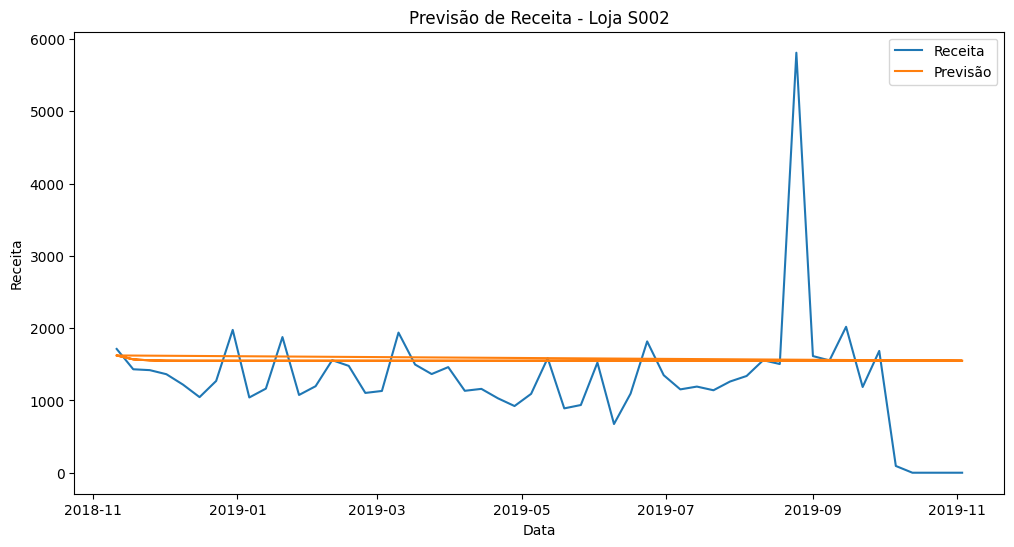

In [30]:
# Filtrar as previsões apenas para a loja específica (por exemplo, "S002")
specific_store_predictions = all_predictions_df[all_predictions_df['store_id'] == 'S0036']

# Plotar o gráfico da receita e da previsão para a loja específica
plt.figure(figsize=(12, 6))
plt.plot(specific_store_predictions['date'], specific_store_predictions['revenue'], label='Receita')
plt.plot(specific_store_predictions['date'], specific_store_predictions['revenue_prediction'], label='Previsão')
plt.title(f"Previsão de Receita - Loja S002")
plt.xlabel("Data")
plt.ylabel("Receita")
plt.legend()
plt.show()